# 🌧️ **Rainfall Prediction with Advanced Machine Learning**

**Author**: [Teerapong (Kao) Panboonyuen](https://kaopanboonyuen.github.io/rainfall-prediction-a-machine-learning-approach/)  
**Project**: *Cutting-Edge ML Techniques for Rainfall Forecasting*  
**License**: [MIT License](https://opensource.org/licenses/MIT)

---

### 📝 **Overview**
This notebook outlines the training loop for our rainfall prediction model. Key functionalities include:

- **Configuration**: Reads parameters from a YAML file.
- **Data Loading**: Prepares the dataset for training.
- **Model Initialization**: Sets up the architecture.
- **Training**: Executes the training process on the specified dataset.

---

In [215]:
import warnings
warnings.filterwarnings("ignore")

In [216]:
!ls

README.md
Rainfall_Prediction_A_Neural_Network_Approach_(Kao_version_2).ipynb
Rainfall_Prediction_A_Neural_Network_Approach_(Kao_version_3).ipynb
datasets
model_LR.pickle
model_NB.pickle
model_NN.pickle
model_SVM.pickle


In [217]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 10]
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

In [218]:
'''
Elevation.csv
Flow accumulation.csv
Landuse.csv
Rainfall intensity.csv
Slope.csv
Soil types.csv
Target.csv
test_data.csv
'''

Elevation = pd.read_csv("datasets/Elevation.csv")
Flow_accumulation = pd.read_csv("datasets/Flow accumulation.csv")
Landuse = pd.read_csv("datasets/Landuse.csv")
Rainfall_intensity = pd.read_csv("datasets/Rainfall intensity.csv")
Slope = pd.read_csv("datasets/Slope.csv")
Target = pd.read_csv("datasets/Target.csv")

test_data = pd.read_csv("datasets/test_data2.csv")
flood_coor = pd.read_csv("datasets/flood_coor2.csv")
Elevation_coor = pd.read_csv("datasets/Elevation_coor2.csv")

In [219]:
Elevation.set_index('lon', inplace=True)

In [220]:
Flow_accumulation.set_index('lon', inplace=True)

In [221]:
Landuse.set_index('lon', inplace=True)

In [222]:
Rainfall_intensity.set_index('lon', inplace=True)

In [223]:
Slope.set_index('lon', inplace=True)

In [224]:
Target.set_index('lon', inplace=True)

In [225]:
test_data.set_index('lon', inplace=True)

In [226]:
#flood_coor.set_index('lon', inplace=True)

In [227]:
#Elevation_coor.set_index('lon', inplace=True)

In [228]:
dfs = [Elevation, Flow_accumulation, Landuse, Rainfall_intensity, Slope, Target]

result = pd.concat(dfs)

In [229]:
result.head()

,lat,elevation,flow accumulation,land use,Rainfall intensity,slope,target
lon,,,,,,,
14.222500,100.243334,6.0,NaN,NaN,NaN,NaN,NaN
14.223334,100.243334,5.0,NaN,NaN,NaN,NaN,NaN
14.224167,100.243334,8.0,NaN,NaN,NaN,NaN,NaN
14.225000,100.243334,6.0,NaN,NaN,NaN,NaN,NaN
14.225834,100.243334,7.0,NaN,NaN,NaN,NaN,NaN


In [230]:
result.sample(10)

,lat,elevation,flow accumulation,land use,Rainfall intensity,slope,target
lon,,,,,,,
14.564167,100.507500,NaN,NaN,NaN,NaN,0.112,NaN
14.518334,100.508334,NaN,NaN,NaN,NaN,0.337,NaN
14.276667,100.416667,NaN,12.0,NaN,NaN,NaN,NaN
14.265000,100.540834,4.0,NaN,NaN,NaN,NaN,NaN
14.364167,100.404167,NaN,NaN,NaN,NaN,0.711,NaN
14.549167,100.717500,6.0,NaN,NaN,NaN,NaN,NaN
14.370834,100.271667,NaN,NaN,NaN,NaN,1.061,NaN
14.403334,100.716667,NaN,NaN,NaN,NaN,0.795,NaN
14.160834,100.436667,NaN,15.0,NaN,NaN,NaN,NaN


In [231]:
result.reset_index()

,lon,lat,elevation,flow accumulation,land use,Rainfall intensity,slope,target
0,14.222500,100.243334,6.0,NaN,NaN,NaN,NaN,NaN
1,14.223334,100.243334,5.0,NaN,NaN,NaN,NaN,NaN
2,14.224167,100.243334,8.0,NaN,NaN,NaN,NaN,NaN
3,14.225000,100.243334,6.0,NaN,NaN,NaN,NaN,NaN
4,14.225834,100.243334,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
934214,14.338482,100.724899,NaN,NaN,NaN,NaN,NaN,1.0
934215,14.268592,100.741778,NaN,NaN,NaN,NaN,NaN,1.0
934216,14.299228,100.756537,NaN,NaN,NaN,NaN,NaN,1.0
934217,14.325187,100.758334,NaN,NaN,NaN,NaN,NaN,1.0


In [232]:
#result.fillna(0, inplace = True)

In [233]:
result.shape

(934219, 7)

In [234]:
#fulldataset = result.dropna(axis=0, subset=['target'])
result.target.fillna(0.0, inplace=True)

In [235]:
result.shape

(934219, 7)

In [236]:
result.head()

,lat,elevation,flow accumulation,land use,Rainfall intensity,slope,target
lon,,,,,,,
14.222500,100.243334,6.0,NaN,NaN,NaN,NaN,0.0
14.223334,100.243334,5.0,NaN,NaN,NaN,NaN,0.0
14.224167,100.243334,8.0,NaN,NaN,NaN,NaN,0.0
14.225000,100.243334,6.0,NaN,NaN,NaN,NaN,0.0
14.225834,100.243334,7.0,NaN,NaN,NaN,NaN,0.0


In [237]:
result.fillna(result.mean() ,inplace=True)

In [238]:
result.head(15)

,lat,elevation,flow accumulation,land use,Rainfall intensity,slope,target
lon,,,,,,,
14.222500,100.243334,6.0,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.223334,100.243334,5.0,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.224167,100.243334,8.0,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.225000,100.243334,6.0,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.225834,100.243334,7.0,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.226667,100.243334,7.0,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.227500,100.243334,6.0,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.228334,100.243334,6.0,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.229167,100.243334,6.0,544.027806,6.881292,2727.666667,7.355227e+33,0.0


In [239]:
# Count Class 1 and Class 0

result.groupby('target').count()

,lat,elevation,flow accumulation,land use,Rainfall intensity,slope
target,,,,,,
0.0,934027,934027,934027,934027,934027,934027
1.0,192,192,192,192,192,192


In [240]:
data = result

# Done! We've created the final data.

In [241]:
data.sample(10)

,lat,elevation,flow accumulation,land use,Rainfall intensity,slope,target
lon,,,,,,,
14.278334,100.474167,5.454903,544.027806,6.881292,2727.666667,5.730000e-01,0.0
14.315000,100.606667,5.454903,3.000000,6.881292,2727.666667,7.355227e+33,0.0
14.339167,100.294167,5.454903,544.027806,6.881292,2727.666667,5.030000e-01,0.0
14.244167,100.536667,5.454903,3.000000,6.881292,2727.666667,7.355227e+33,0.0
14.220834,100.552500,3.000000,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.253334,100.245834,6.000000,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.485834,100.505834,5.000000,544.027806,6.881292,2727.666667,7.355227e+33,0.0
14.489167,100.528334,5.454903,544.027806,6.881292,2727.666667,6.750000e-01,0.0
14.305000,100.352500,6.000000,544.027806,6.881292,2727.666667,7.355227e+33,0.0


# Let's create neural nets model

In [242]:
data.shape

(934219, 7)

In [243]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data.target==1.0] #I classified negative class as '0'
df_minority = data[data.target==0.0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,       # sample with replacement
                                 n_samples=192,    # to match majority class
                                 random_state=123)   # reproducible results

# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
data.groupby('target').count()

,lat,elevation,flow accumulation,land use,Rainfall intensity,slope
target,,,,,,
0.0,192,192,192,192,192,192
1.0,192,192,192,192,192,192


In [244]:
#Soil types

data = data.rename(columns={'lat': 'Soil types'})

In [245]:
data.dropna(axis=0, inplace=True)

X = data.drop('target',axis=1)
y = data['target']

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

In [248]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [249]:
from sklearn.neural_network import MLPClassifier

In [250]:
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

In [251]:
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=22, max_iter=500,
              random_state=12345, validation_fraction=0.2)

## Predictions and Evaluation

Now that we have a model it is time to use it to get predictions! We can do this simply with the predict() method off of our fitted model:

In [252]:
predictions = mlp.predict(X_test)

In [253]:
from sklearn.metrics import classification_report, confusion_matrix

In [254]:
print(confusion_matrix(y_test,predictions))

[[ 0 47]
 [ 0 49]]


In [255]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.51      1.00      0.68        49

    accuracy                           0.51        96
   macro avg       0.26      0.50      0.34        96
weighted avg       0.26      0.51      0.34        96



In [256]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

scores = []
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred, digits=6)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy scor

nested_score = cross_val_score(model, X_train, y_train, cv=cv,\
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score) 
print(np.max(nested_score))

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        13
         1.0   0.551724  1.000000  0.711111        16

    accuracy                       0.551724        29
   macro avg   0.275862  0.500000  0.355556        29
weighted avg   0.304400  0.551724  0.392337        29

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              preci

[[ 0 47]
 [ 0 49]]
tn, fp, fn, tp = 0 0 47 49


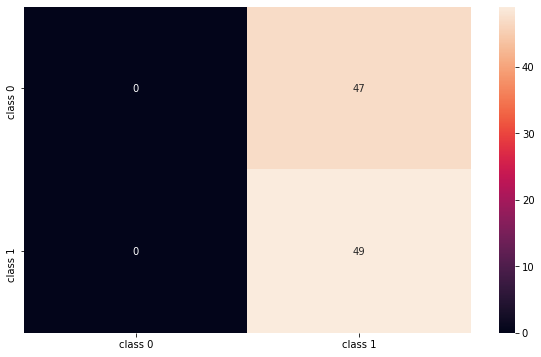

In [257]:
cm =confusion_matrix(y_test,predictions)  
print(cm)
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()
print("tn, fp, fn, tp =", tn, fp, fn, tp)
index = ['class 0','class 1']  
columns = ['class 0','class 1']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

## Model 1: All

In [258]:
data.dropna(axis=0, inplace=True)

X = data.drop('target',axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

scaler = StandardScaler()
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[ 0 47]
 [ 0 49]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.51      1.00      0.68        49

    accuracy                           0.51        96
   macro avg       0.26      0.50      0.34        96
weighted avg       0.26      0.51      0.34        96



In [259]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

scores = []
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred, digits=6)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy scor

nested_score = cross_val_score(model, X_train, y_train, cv=cv,\
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score) 
print(np.max(nested_score))

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        13
         1.0   0.551724  1.000000  0.711111        16

    accuracy                       0.551724        29
   macro avg   0.275862  0.500000  0.355556        29
weighted avg   0.304400  0.551724  0.392337        29

              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        14
         1.0   0.517241  1.000000  0.681818        15

    accuracy                       0.517241        29
   macro avg   0.258621  0.500000  0.340909        29
weighted avg   0.267539  0.517241  0.352665        29

              preci

[[ 0 47]
 [ 0 49]]
tn, fp, fn, tp = 0 0 47 49


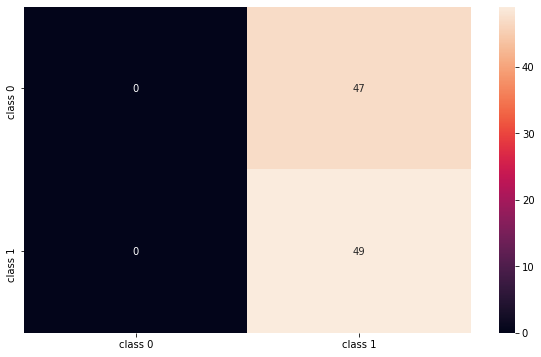

In [260]:
cm =confusion_matrix(y_test,predictions)  
print(cm)
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()
print("tn, fp, fn, tp =", tn, fp, fn, tp)
index = ['class 0','class 1']  
columns = ['class 0','class 1']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

## Model 2: All - Slope

In [261]:
X.columns

Index(['Soil types', 'elevation', 'flow accumulation', 'land use',
       'Rainfall intensity', 'slope'],
      dtype='object')

In [262]:
data.dropna(axis=0, inplace=True)

X = data.drop(['target','slope'],axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

scaler = StandardScaler()
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[29 18]
 [21 28]]
              precision    recall  f1-score   support

         0.0       0.58      0.62      0.60        47
         1.0       0.61      0.57      0.59        49

    accuracy                           0.59        96
   macro avg       0.59      0.59      0.59        96
weighted avg       0.59      0.59      0.59        96



[[29 18]
 [21 28]]
tn, fp, fn, tp = 29 21 18 28


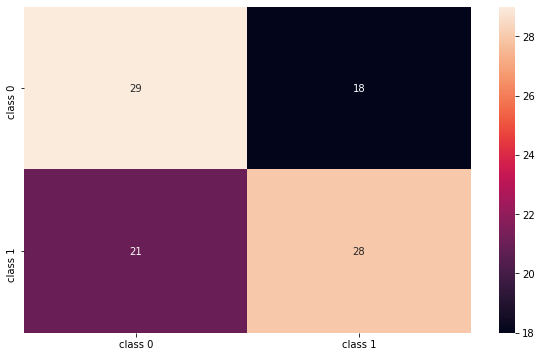

In [263]:
cm =confusion_matrix(y_test,predictions)  
print(cm)
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()
print("tn, fp, fn, tp =", tn, fp, fn, tp)
index = ['class 0','class 1']  
columns = ['class 0','class 1']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

In [264]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

scores = []
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred, digits=6)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy scor

nested_score = cross_val_score(model, X_train, y_train, cv=cv,\
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score) 
print(np.max(nested_score))

              precision    recall  f1-score   support

         0.0   0.461538  0.428571  0.444444        14
         1.0   0.500000  0.533333  0.516129        15

    accuracy                       0.482759        29
   macro avg   0.480769  0.480952  0.480287        29
weighted avg   0.481432  0.482759  0.481523        29

              precision    recall  f1-score   support

         0.0   0.533333  0.615385  0.571429        13
         1.0   0.642857  0.562500  0.600000        16

    accuracy                       0.586207        29
   macro avg   0.588095  0.588942  0.585714        29
weighted avg   0.593760  0.586207  0.587192        29

              precision    recall  f1-score   support

         0.0   0.687500  0.785714  0.733333        14
         1.0   0.769231  0.666667  0.714286        15

    accuracy                       0.724138        29
   macro avg   0.728365  0.726190  0.723810        29
weighted avg   0.729775  0.724138  0.723481        29

              preci

## Model 3: All - Slope - Rainfall


In [265]:
data.dropna(axis=0, inplace=True)

X = data.drop(['target','slope','Rainfall intensity'],axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

scaler = StandardScaler()
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[25 22]
 [11 38]]
              precision    recall  f1-score   support

         0.0       0.69      0.53      0.60        47
         1.0       0.63      0.78      0.70        49

    accuracy                           0.66        96
   macro avg       0.66      0.65      0.65        96
weighted avg       0.66      0.66      0.65        96



[[25 22]
 [11 38]]
tn, fp, fn, tp = 25 11 22 38


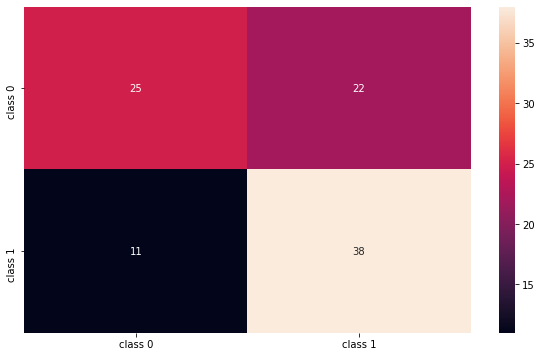

In [266]:
cm =confusion_matrix(y_test,predictions)  
print(cm)
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()
print("tn, fp, fn, tp =", tn, fp, fn, tp)
index = ['class 0','class 1']  
columns = ['class 0','class 1']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

In [267]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

scores = []
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred, digits=6)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy scor

nested_score = cross_val_score(model, X_train, y_train, cv=cv,\
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score) 
print(np.max(nested_score))

              precision    recall  f1-score   support

         0.0   0.800000  0.285714  0.421053        14
         1.0   0.583333  0.933333  0.717949        15

    accuracy                       0.620690        29
   macro avg   0.691667  0.609524  0.569501        29
weighted avg   0.687931  0.620690  0.574620        29

              precision    recall  f1-score   support

         0.0   0.571429  0.307692  0.400000        13
         1.0   0.590909  0.812500  0.684211        16

    accuracy                       0.586207        29
   macro avg   0.581169  0.560096  0.542105        29
weighted avg   0.582176  0.586207  0.556806        29

              precision    recall  f1-score   support

         0.0   1.000000  0.214286  0.352941        14
         1.0   0.576923  1.000000  0.731707        15

    accuracy                       0.620690        29
   macro avg   0.788462  0.607143  0.542324        29
weighted avg   0.781167  0.620690  0.548855        29

              preci

## Model 4: All - Slope - Rainfall - Landuse


In [268]:
data.dropna(axis=0, inplace=True)

X = data.drop(['target','slope','Rainfall intensity','land use'],axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

scaler = StandardScaler()
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[16 31]
 [ 5 44]]
              precision    recall  f1-score   support

         0.0       0.76      0.34      0.47        47
         1.0       0.59      0.90      0.71        49

    accuracy                           0.62        96
   macro avg       0.67      0.62      0.59        96
weighted avg       0.67      0.62      0.59        96



In [269]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

scores = []
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=22, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.2,
       verbose=False, warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred, digits=6)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy scor

nested_score = cross_val_score(model, X_train, y_train, cv=cv,\
               scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score) 
print(np.max(nested_score))

              precision    recall  f1-score   support

         0.0   1.000000  0.071429  0.133333        14
         1.0   0.535714  1.000000  0.697674        15

    accuracy                       0.551724        29
   macro avg   0.767857  0.535714  0.415504        29
weighted avg   0.759852  0.551724  0.425234        29

              precision    recall  f1-score   support

         0.0   0.666667  0.307692  0.421053        13
         1.0   0.608696  0.875000  0.717949        16

    accuracy                       0.620690        29
   macro avg   0.637681  0.591346  0.569501        29
weighted avg   0.634683  0.620690  0.584857        29

              precision    recall  f1-score   support

         0.0   1.000000  0.285714  0.444444        14
         1.0   0.600000  1.000000  0.750000        15

    accuracy                       0.655172        29
   macro avg   0.800000  0.642857  0.597222        29
weighted avg   0.793103  0.655172  0.602490        29

              preci

[[16 31]
 [ 5 44]]
tn, fp, fn, tp = 16 5 31 44


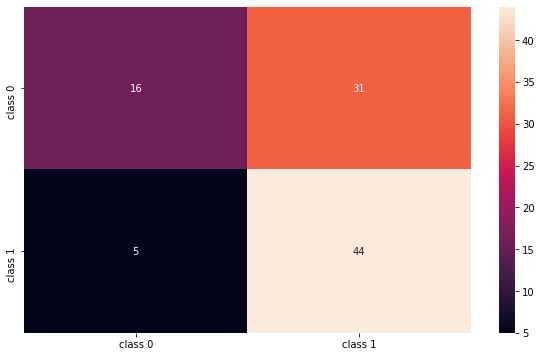

In [270]:
cm =confusion_matrix(y_test,predictions)  
print(cm)
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()
print("tn, fp, fn, tp =", tn, fp, fn, tp)
index = ['class 0','class 1']  
columns = ['class 0','class 1']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

# Feature Important (RF)

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [272]:
data.dropna(axis=0, inplace=True)

X = data.drop('target',axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

scaler = StandardScaler()
scaler.fit(X_train)

# # Now apply the transformations to the data:
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

StandardScaler()

In [273]:
X_train

,Soil types,elevation,flow accumulation,land use,Rainfall intensity,slope
lon,,,,,,
14.373334,100.351667,5.454903,544.027806,6.881292,2727.666667,7.540000e-01
14.415000,100.675834,5.000000,544.027806,6.881292,2727.666667,7.355227e+33
14.508334,100.747500,11.000000,544.027806,6.881292,2727.666667,7.355227e+33
14.411667,100.718334,5.000000,544.027806,6.881292,2727.666667,7.355227e+33
14.664247,100.582899,5.454903,544.027806,6.881292,2727.666667,7.355227e+33
...,...,...,...,...,...,...
14.236667,100.640000,5.454903,116.000000,6.881292,2727.666667,7.355227e+33
14.450000,100.732500,7.000000,544.027806,6.881292,2727.666667,7.355227e+33
14.217315,100.618216,5.454903,544.027806,6.881292,2727.666667,7.355227e+33


In [274]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [275]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.938


In [276]:
data.columns

Index(['Soil types', 'elevation', 'flow accumulation', 'land use',
       'Rainfall intensity', 'slope', 'target'],
      dtype='object')

<BarContainer object of 6 artists>

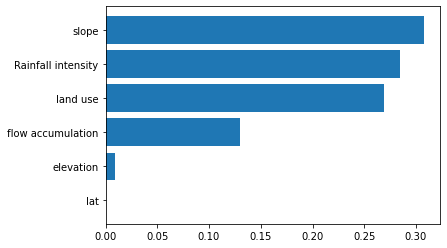

In [277]:
sorted_idx = rf.feature_importances_.argsort()

plt.barh(['lat', 'elevation', 'flow accumulation', 'land use',
       'Rainfall intensity', 'slope'], rf.feature_importances_[sorted_idx])

# SHAP

In [278]:
import shap

In [279]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

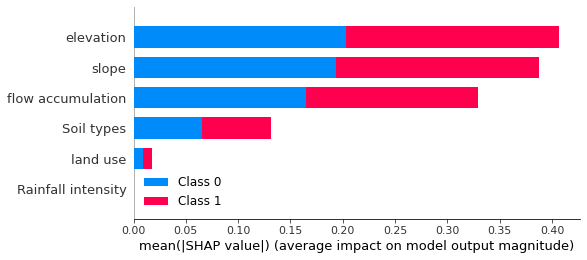

In [280]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

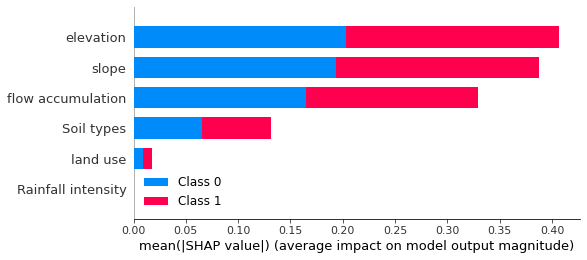

In [281]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

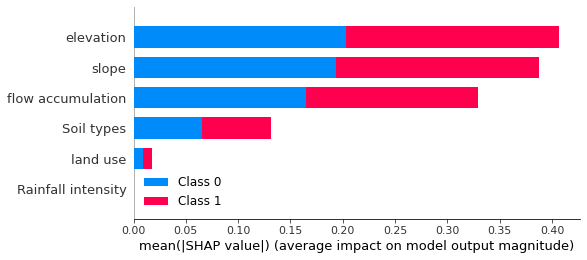

In [282]:
shap.summary_plot(shap_values, X_test)

# Compare ML Model

In [283]:
#
from pandas.plotting import scatter_matrix

# 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

LR has accuracy score:  0.5035087719298247
NB has accuracy score:  0.6665456745311554
SVM has accuracy score:  0.6665456745311554
NN has accuracy score:  0.6665456745311554


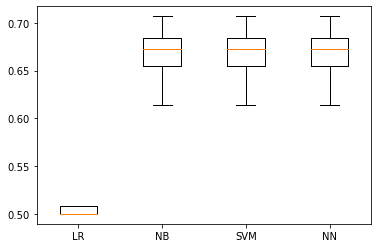

In [284]:
# Building Models for iris flower classification

np.random.seed(1000)
# making a list of ml classification models
models = []

def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('SVM',  SVC()) )
    models.append( ('NN',  MLPClassifier(hidden_layer_sizes=(64,64), random_state=1) ) )
    

    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 5, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name, 'has accuracy score: ',v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    #print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(X_train, X_test, y_train, y_test)

# Train Model

In [285]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992)

for name,model in models:
    trainedmodel = model.fit(X_train,y_train)
    
    # prediction
    ypredict = trainedmodel.predict(X_test)
    
    acc = accuracy_score(y_test,ypredict)
    classreport = classification_report(y_test,ypredict)
    confMat = confusion_matrix(y_test,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    
    
    # save models
    import pickle as pk
    
    with open('model_'+name+'.pickle','wb') as f:
        pk.dump(trainedmodel,f)


****************************LR
The accuracy: 0.4895833333333333
The Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        47
         1.0       0.00      0.00      0.00        49

    accuracy                           0.49        96
   macro avg       0.24      0.50      0.33        96
weighted avg       0.24      0.49      0.32        96

The Confusion Matrix:
 [[47  0]
 [49  0]]

****************************NB
The accuracy: 0.6666666666666666
The Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.32      0.48        47
         1.0       0.60      1.00      0.75        49

    accuracy                           0.67        96
   macro avg       0.80      0.66      0.62        96
weighted avg       0.80      0.67      0.62        96

The Confusion Matrix:
 [[15 32]
 [ 0 49]]

****************************SVM
The accuracy: 0.6666666666666666
The Classi

# GridSearch NN

In [319]:
from sklearn.model_selection import GridSearchCV, cross_val_score

def nn_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'solver': ['adam','lbfgs'], 
                  'max_iter': [100,500,1000,1500], 
                  #'alpha': 10.0 ** -np.arange(1, 10), 
                  'hidden_layer_sizes':[1,8,16,22,32,64,128,256], 
                  'random_state':[1,2,3] }
    # decision tree model
    nn=MLPClassifier()

    #use gridsearch to test all values
    nn_gscv = GridSearchCV(nn, param_grid, cv=nfolds)
    #fit model to data
    nn_gscv.fit(X, y)
    return nn_gscv.best_params_, nn_gscv.best_score_, nn_gscv.best_estimator_

In [320]:
param, score, model = nn_grid_search(X_train,y_train, 5)
nn = model

In [321]:
param

{'hidden_layer_sizes': 22,
 'max_iter': 100,
 'random_state': 2,
 'solver': 'adam'}